In [6]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# model specific info
from rural_beauty.config import data_dir, models_dir 
import importlib

module_name = "rural_beauty.config"
para_outcome = 'beauty'
para_type = 'randomforest'
sugar    =  '111124'  # random identifier to have different models with same other paras
country = 'DE'

model_basename = f"{country}_{para_outcome}_{para_type}_{sugar}"
model_folder = models_dir / model_basename

output_raster_path = model_folder / 'prediction.tif'

# Paths to the two raster files
raster_path_1 = output_raster_path
raster_name_1 = country

module_name = "rural_beauty.config"
para_outcome = 'scenic'
para_type = 'randomforest'
sugar    =  '111124'  # random identifier to have different models with same other paras
country = 'UK'

model_basename = f"{country}_{para_outcome}_{para_type}_{sugar}"
model_folder = models_dir / model_basename

output_raster_path = model_folder / 'prediction.tif'



raster_path_2 = output_raster_path
raster_name_2 = country

print(raster_path_1)
print(raster_path_2)


/h/u145/hofer/MyDocuments/Granular/beauty/data/models/DE_beauty_randomforest_111124/prediction.tif
/h/u145/hofer/MyDocuments/Granular/beauty/data/models/UK_scenic_randomforest_111124/prediction.tif


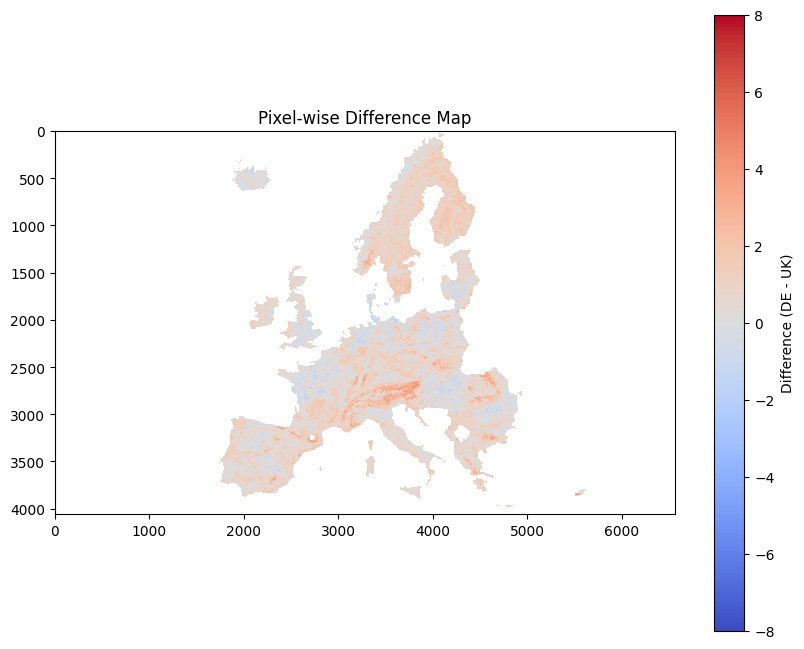

In [43]:

# Load the rasters
with rasterio.open(raster_path_1) as src1, rasterio.open(raster_path_2) as src2:
    raster1 = src1.read(1)
    raster2 = src2.read(1)

# Mask nodata values (assuming -99 is the nodata value)
raster1 = np.where(raster1 == -99, np.nan, raster1)
raster2 = np.where(raster2 == -99, np.nan, raster2)

# Count occurrences of classes 1 to 9 in each raster
class_counts_raster1 = {i: np.sum(raster1 == i) for i in range(1, 10)}
class_counts_raster2 = {i: np.sum(raster2 == i) for i in range(1, 10)}

# Compute difference map
difference_map = raster1 - raster2

# Plot the difference map
plt.figure(figsize=(10, 8))
plt.imshow(difference_map, cmap='coolwarm', vmin=-8, vmax=8)
plt.colorbar(label=f"Difference ({raster_name_1} - {raster_name_2})")
plt.title("Pixel-wise Difference Map")
plt.show()


In [41]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred):
    """
    Plots a simple confusion matrix with minimal configuration.
    """


        # Create a mask for elements that are not NaN in both arrays
    valid_mask = ~np.isnan(y_true) & ~np.isnan(y_pred)

    # Filter the arrays using the mask
    y_true = y_true[valid_mask]
    y_pred = y_pred[valid_mask]

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()  # Adds a colorbar to show the scale
    plt.title('Confusion Matrix')
    plt.ylabel('Raster 1')
    plt.xlabel('Raster 2')


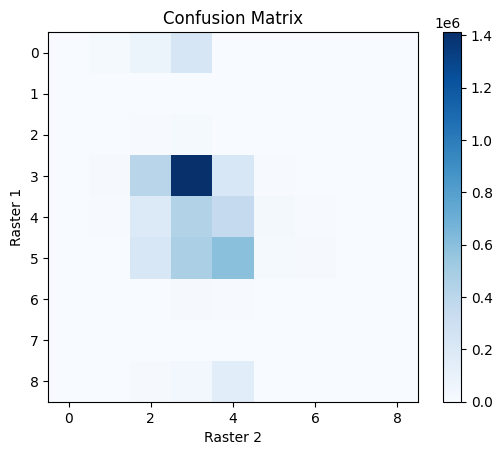

In [42]:
plot_confusion_matrix(raster1.flatten(), raster2.flatten())

In [32]:
r1 = raster1.flatten()
r2 = raster2.flatten()


valid_mask = ~np.isnan(r1) & ~np.isnan(r2)

# Filter the arrays using the mask
r1 = r1[valid_mask]
r2 = r2[valid_mask]



In [37]:
correlation_matrix = np.corrcoef(r1, r2)

# The correlation coefficient is the value at [0, 1] or [1, 0]
correlation_coefficient = correlation_matrix[0, 1]
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: 0.3269852761360094
